In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [3]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [4]:
class FourierBasis1D:
    def __init__(self, h):
        self.h = h
        self.n = np.arange(0,self.h)
        self.L = 1
        self.k_n = 2*np.pi*self.n/self.L
    
    def forward(self, x):
        basis_values = np.zeros((x.shape[0],self.h))
        n = 0
        for i in np.arange(0,self.h,2):
            basis_values[:,i] = np.cos(self.k_n[n]*x)
            n+=1
        n = 1
        for i in np.arange(1,self.h,2):
            basis_values[:,i] = np.sin(self.k_n[n]*x)
            n+=1
        return basis_values
    
    def grad(self, x):
        basis_gradients = np.zeros((x.shape[0],self.h))
        n = 0
        for i in np.arange(0,self.h,2):
            basis_gradients[:,i] = -self.k_n[n]*np.sin(self.k_n[n]*x)
            n+=1
        n = 1
        for i in np.arange(1,self.h,2):
            basis_gradients[:,i] = self.k_n[n]*np.cos(self.k_n[n]*x)
            n+=1
        return basis_gradients

    def plot_1d_basis(self):
        resolution = 1000
        x_values = np.linspace(0, 1, resolution)  # Adjusted range for x_values
        basis_matrix = self.forward(x_values)
        plt.figure(figsize=(8, 6))
        for i in range(self.h):
            plt.plot(x_values, basis_matrix[:,i], label=f'Basis {i}')
        plt.title(f'1D Basis Functions')
        plt.xlabel('x')
        plt.ylabel('Basis Values')
        plt.legend()
        plt.grid(True)
        # plt.savefig("BSpline1D.svg", bbox_inches='tight', transparent=True)
        plt.show()
        
    def plot_1d_basis_gradients(self):
        """
        Plot the gradients of the 1D B-spline basis functions for a specified dimension.

        Args:
        dim_idx (int): Index of the dimension for which to plot the basis function gradients.
        """
        resolution = 1000
        x_values = np.linspace(0, 1, resolution)  # Use full knot span for x_values
        basis_gradients_matrix = self.grad(x_values)
        plt.figure(figsize=(8, 6))
        for i in range(self.h):
            plt.plot(x_values, basis_gradients_matrix[:, i], label=f'Gradient {i}')
        plt.title(f'Gradients of 1D Basis Functions')
        plt.xlabel('x')
        plt.ylabel('Gradient Values')
        plt.legend()
        plt.grid(True)
        # plt.savefig("BSplinegrad1D.svg", bbox_inches='tight', transparent=True)
        plt.show()

In [11]:
basis = FourierBasis1D(h=5)

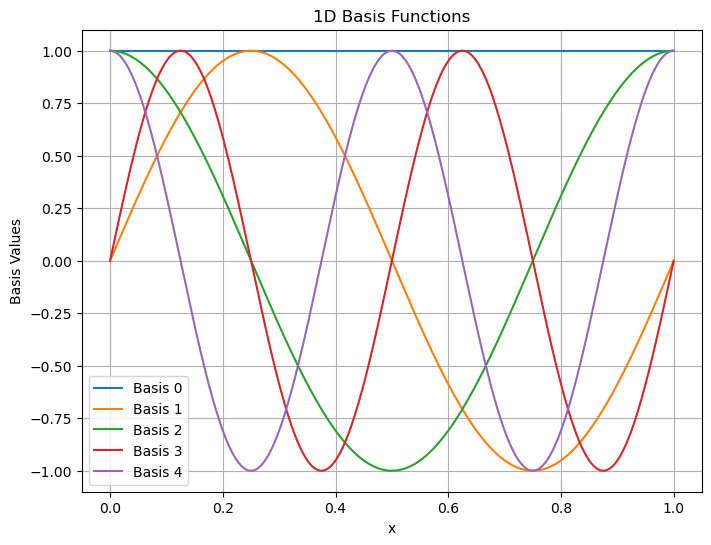

In [12]:
basis.plot_1d_basis()

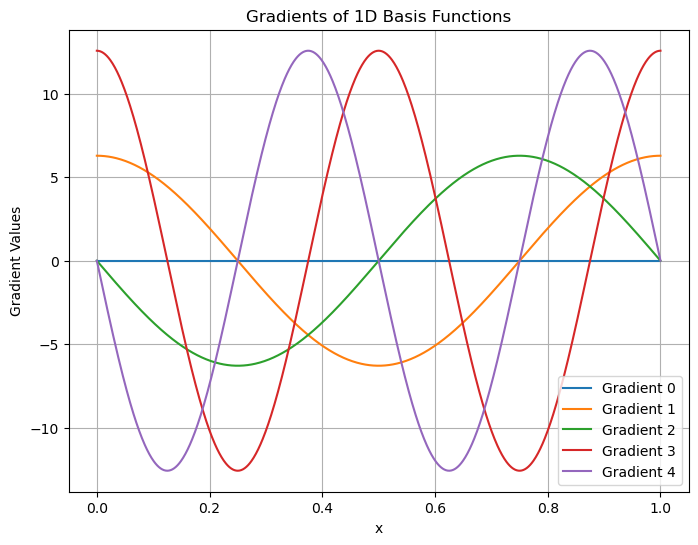

In [13]:
basis.plot_1d_basis_gradients()